In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

Pre process columns to one hot encoding as they are currently texts and a range of ints

In [20]:

# Load and preprocess the data
data = pd.read_csv("CleanedSeattleData.csv")

# Convert 'INJURIES' column to binary (1 if injuries > 0, else 0)

# Prepare the features and target
X = data[['WEATHER', 'ROADCOND', 'LIGHTCOND', 'JUNCTIONTYPE','ADDRTYPE' ,'UNDERINFL']]  # Features
y = data['INJURY_BINARY'] = data['SEVERITYCODE'].apply(lambda x: 1 if x > 1 else 0)
# Split the data - 80% for training and 20% for testing
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)
# The above splits the data into 60% training, 20% validation, and 20% testing

# Create the Logistic Regression model
best_accuracy = 0
best_C = None
best_model = None

# Loop over different values of C
for C_value in np.arange(0.01, 1, 0.05):
    # Create the Logistic Regression model with current C value
    logreg = LogisticRegression(C=C_value)

    # Train the model using the training set
    logreg.fit(X_train, y_train)

    # Make predictions on the validation set
    y_pred_val = logreg.predict(X_val)

    # Evaluate the model on the validation set
    accuracy_val = accuracy_score(y_val, y_pred_val)
    print(f"C = {C_value:.2f}, Validation Accuracy = {accuracy_val:.4f}")

    # Check if current model has better validation accuracy
    if accuracy_val > best_accuracy:
        best_accuracy = accuracy_val
        best_C = C_value
        best_model = logreg

# Use the best model for testing
y_pred_test = best_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"\nBest Model - C = {best_C:.2f}, Testing Accuracy = {accuracy_test:.4f}")

C = 0.01, Validation Accuracy = 0.6521
C = 0.06, Validation Accuracy = 0.6521
C = 0.11, Validation Accuracy = 0.6521
C = 0.16, Validation Accuracy = 0.6521
C = 0.21, Validation Accuracy = 0.6521
C = 0.26, Validation Accuracy = 0.6521
C = 0.31, Validation Accuracy = 0.6521
C = 0.36, Validation Accuracy = 0.6521
C = 0.41, Validation Accuracy = 0.6521
C = 0.46, Validation Accuracy = 0.6521
C = 0.51, Validation Accuracy = 0.6521
C = 0.56, Validation Accuracy = 0.6521
C = 0.61, Validation Accuracy = 0.6521
C = 0.66, Validation Accuracy = 0.6521
C = 0.71, Validation Accuracy = 0.6521
C = 0.76, Validation Accuracy = 0.6521
C = 0.81, Validation Accuracy = 0.6521
C = 0.86, Validation Accuracy = 0.6521
C = 0.91, Validation Accuracy = 0.6521
C = 0.96, Validation Accuracy = 0.6521

Best Model - C = 0.01, Testing Accuracy = 0.6556


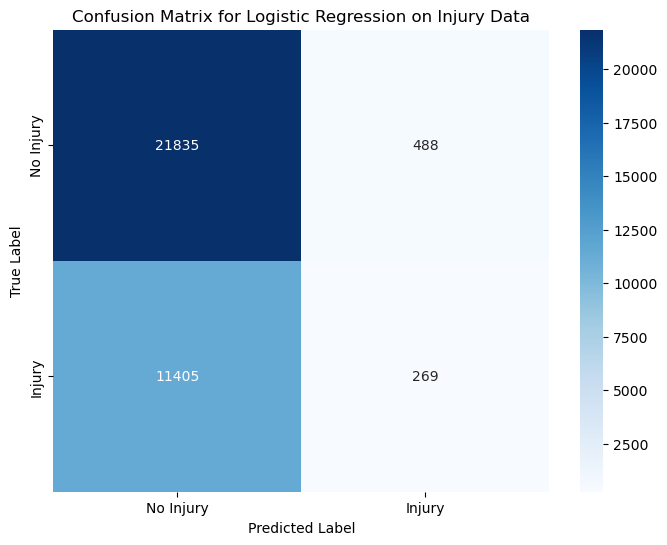

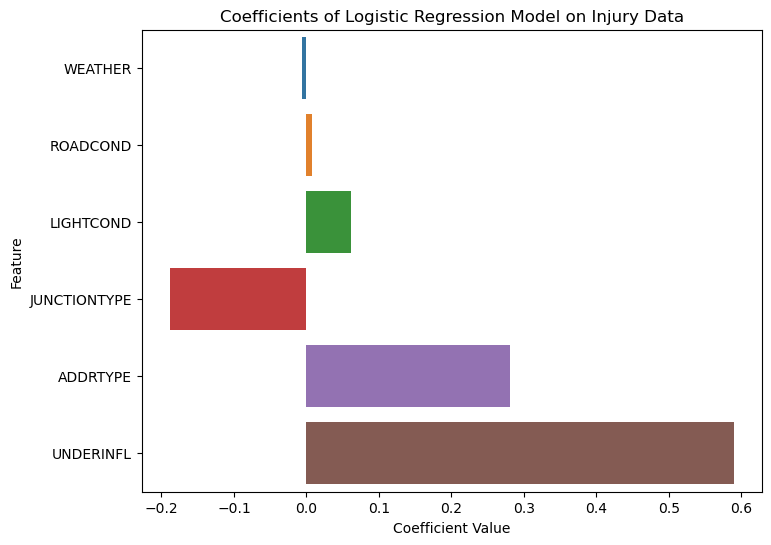

In [22]:

# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Injury', 'Injury'], yticklabels=['No Injury', 'Injury'])
plt.title('Confusion Matrix for Logistic Regression on Injury Data')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Coefficient bar plot
coef = logreg.coef_[0]
plt.figure(figsize=(8, 6))
sns.barplot(x=coef, y=['WEATHER', 'ROADCOND', 'LIGHTCOND', 'JUNCTIONTYPE' ,'ADDRTYPE','UNDERINFL'])
plt.title('Coefficients of Logistic Regression Model on Injury Data')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()
